In [150]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Importing data into dataframes
restaurant_df = pd.read_csv('Datasets/Capstone 3/resturants.csv')
item_df = pd.read_csv('Datasets/Capstone 3/items.csv')
sales_df = pd.read_csv('Datasets/Capstone 3/sales.csv')

## Examine the dataset's shape and structure, and look out for any outlier

In [152]:
# Printing the shape of each dataframe
print('restaurant_df shape: ', restaurant_df.shape)
print('item_df shape: ', item_df.shape)
print('sales_df shape: ', sales_df.shape)

restaurant_df shape:  (6, 2)
item_df shape:  (100, 5)
sales_df shape:  (109600, 4)


In [153]:
# Printing the top 5 data of each dataframe
print('############# restaurant data sample #######################\n')
print(restaurant_df.head())
print('\n############# items data sample #######################\n')
print(item_df.head())
print('\n############# sales data sample #######################\n')
print(sales_df.head())

############# restaurant data sample #######################

   id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe

############# items data sample #######################

   id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

############# sales data sample #######################

         date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0


In [154]:
# Describing the dataframes
print('################# describing items ##################\n')
print(item_df.describe())
print('\n################# describing sales ##################\n')
print(sales_df.describe())

################# describing items ##################

               id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000   53.980000

################# describing sales ##################

             item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000  

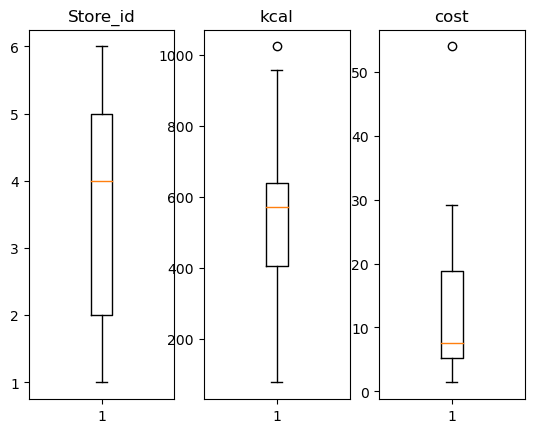

In [155]:
#Plotting boxplots to look for outliers
# item_df.boxplot()
plt.subplot(1,3,1)
plt.boxplot(item_df['store_id'])
plt.title('Store_id')

plt.subplot(1,3,2)
plt.boxplot(item_df['kcal'])
plt.title('kcal')

plt.subplot(1,3,3)
plt.boxplot(item_df['cost'])
plt.title('cost')

plt.show()

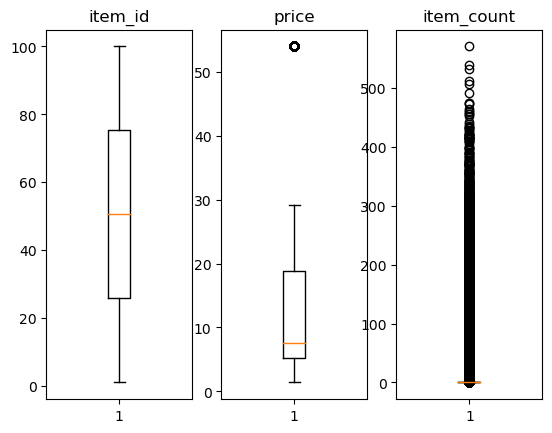

In [156]:
plt.subplot(1,3,1)
plt.boxplot(sales_df['item_id'])
plt.title('item_id')

plt.subplot(1,3,2)
plt.boxplot(sales_df['price'])
plt.title('price')

plt.subplot(1,3,3)
plt.boxplot(sales_df['item_count'])
plt.title('item_count')

plt.show()

#### Result: We have outliers for 'cost' and 'item_count'

## c. Merge the datasets into a single dataset that includes the date, item id, price, item count, item names, kcal values, store id, and store name


In [157]:
# Merging restaurant and item dataset into single dataset
merged_df = pd.merge(restaurant_df, item_df, left_on = 'id', right_on = 'store_id', suffixes = ('_store', '_item'))
columns_to_remove = ['store_id']
merged_df.drop(columns = columns_to_remove, inplace = True)
merged_df.rename(columns = {'id_store' : 'store_id', 'name_store' : 'store_name', 'name_item' : 'item_name'}, inplace = True)
merged_df.head()

,store_id,store_name,id_item,item_name,kcal,cost
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22
1,1,Bob's Diner,4,Amazing Steak Dinner with Rolls,763,26.42
2,1,Bob's Diner,9,Orange Juice,135,3.91
3,1,Bob's Diner,12,Fantastic Sweet Cola,478,4.87
4,1,Bob's Diner,13,Sweet Frozen Soft Drink,490,4.18


In [158]:
# Merging sales_df into merged_df
merged_df1 = pd.merge(merged_df, sales_df, left_on = 'id_item', right_on = 'item_id', suffixes = ('_merged', '_sales'))
# merged_df.tail(10)
merged_df1.drop(columns = ['item_id', 'price'], inplace = True)
merged_df1.rename(columns = {'id_item' : 'item_id'}, inplace = True)
merged_df1.columns
merged_df1.tail()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count
109595,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-27,0.0
109596,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-28,0.0
109597,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-29,0.0
109598,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-30,0.0
109599,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-31,0.0


# Exploratory data analysis:

## a. Examine the overall date wise sales to understand the pattern

In [159]:
# Printing info for sales_df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [160]:
# Converting string date to datetime and calculating total_price using price and item_count
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df['total_price'] = sales_df['price'] * sales_df['item_count']

In [161]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         109600 non-null  datetime64[ns]
 1   item_id      109600 non-null  int64         
 2   price        109600 non-null  float64       
 3   item_count   109600 non-null  float64       
 4   total_price  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.2 MB


In [162]:
sales_df.head()

,date,item_id,price,item_count,total_price
0,2019-01-01,3,29.22,2.0,58.44
1,2019-01-01,4,26.42,22.0,581.24
2,2019-01-01,12,4.87,7.0,34.09
3,2019-01-01,13,4.18,12.0,50.16
4,2019-01-01,16,3.21,136.0,436.56


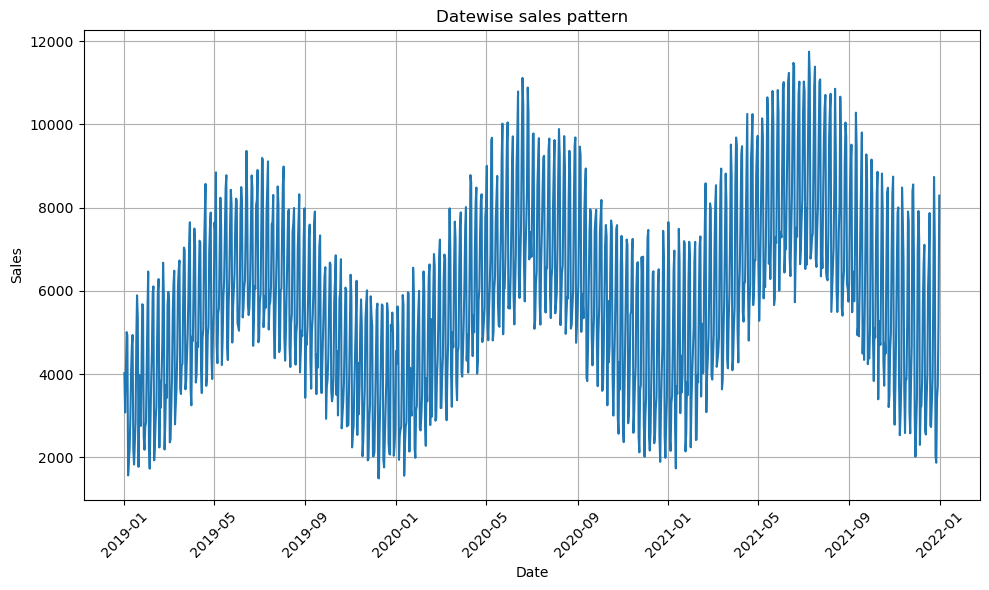

In [163]:
# Plotting total sales w.r.t date
# plt.plot(sales_df['date_in_datetime'], sales_df.groupby(sales_df['date'])[['total_price']].sum())
datewise_sales = sales_df.groupby('date')['total_price'].sum().reset_index()
# y = sales_df['date_in_datetime'].unique()
# plt.plot(y,x)
# plt.show()
plt.figure(figsize = (10,6))
plt.plot(datewise_sales['date'], datewise_sales['total_price'])
plt.title('Datewise sales pattern')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Conclusion :- There is upper trend in total_sales from Janury to July and downward trend from july to December.

## b. Find out how sales fluctuate across different days of the week


In [164]:
sales_df['day_of_week'] = sales_df['date'].dt.day_name()
sales_df.head()

,date,item_id,price,item_count,total_price,day_of_week
0,2019-01-01,3,29.22,2.0,58.44,Tuesday
1,2019-01-01,4,26.42,22.0,581.24,Tuesday
2,2019-01-01,12,4.87,7.0,34.09,Tuesday
3,2019-01-01,13,4.18,12.0,50.16,Tuesday
4,2019-01-01,16,3.21,136.0,436.56,Tuesday


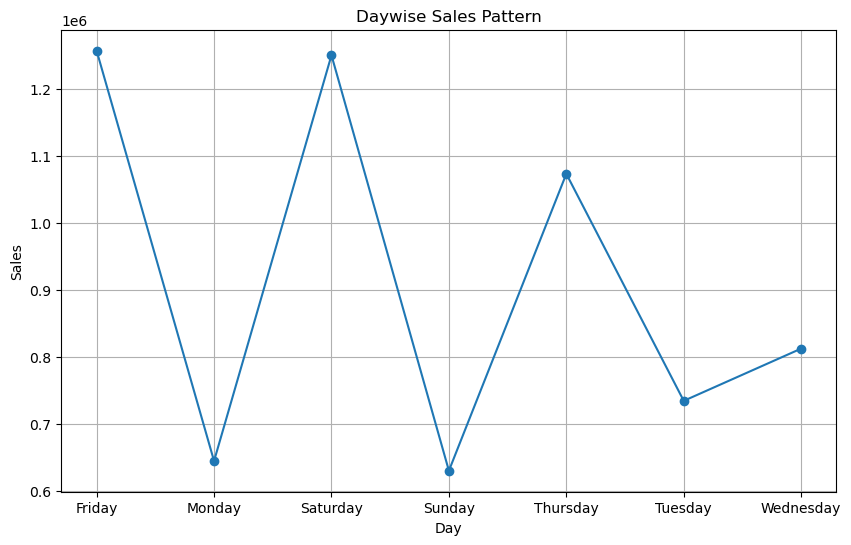

In [165]:
# Plotting dayWise Sales
dayWise_sales = sales_df.groupby('day_of_week')['total_price'].sum().reset_index()

plt.figure(figsize = (10,6))
plt.plot(dayWise_sales['day_of_week'], dayWise_sales['total_price'], marker = 'o', linestyle = '-')
plt.title('Daywise Sales Pattern')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [166]:
dayWise_sales.head(10)

,day_of_week,total_price
0,Friday,1257338.16
1,Monday,644799.97
2,Saturday,1250574.32
3,Sunday,630279.71
4,Thursday,1073534.52
5,Tuesday,734598.46
6,Wednesday,812613.31


#### Conclusion :- Total_sales are increasing from Sunday to Saturday. Highest sales are on Fridays and Saturdays.

## c. Look for any noticeable trends in the sales data for different months of the year

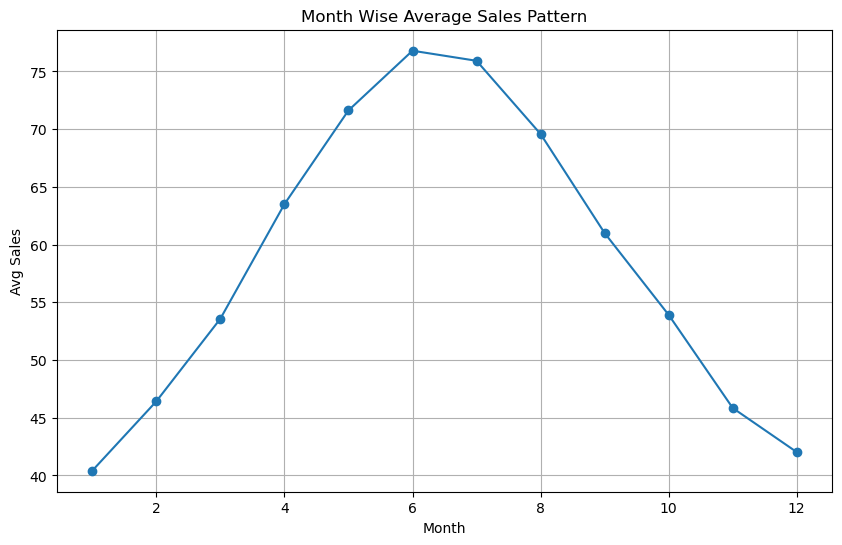

In [167]:
# Plotting MonthWise sales pattern
monthWise_sales = sales_df.groupby(sales_df['date'].dt.month)['total_price'].mean().reset_index()

plt.figure(figsize = (10,6))
plt.plot(monthWise_sales['date'], monthWise_sales['total_price'], marker = 'o', linestyle = '-')
plt.title('Month Wise Average Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Avg Sales')
plt.grid(True)

plt.show()

#### Conclusion :- Sales are increasing from January to June and then decreasing afterwards.

## d. Examine the sales distribution across different quarters averaged over the years. Identify any noticeable patterns.

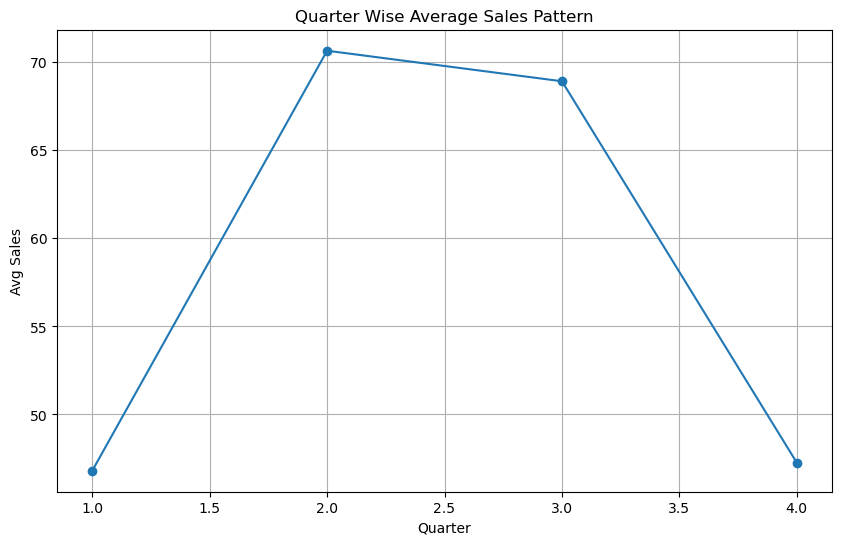

In [168]:
# Plotting QuarterWise sales pattern
quarterWise_Sales = sales_df.groupby(sales_df['date'].dt.quarter)['total_price'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(quarterWise_Sales['date'], quarterWise_Sales['total_price'], marker = 'o', linestyle = '-')
plt.title('Quarter Wise Average Sales Pattern')
plt.xlabel('Quarter')
plt.ylabel('Avg Sales')
plt.grid(True)

plt.show()

#### Conclusion :- Sales are high in 2nd and 3rd quarter.

## e. Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days.

In [169]:
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0


In [170]:
merged_df1['total_cost'] = merged_df1['cost'] * merged_df1['item_count']
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    109600 non-null  int64  
 1   store_name  109600 non-null  object 
 2   item_id     109600 non-null  int64  
 3   item_name   109600 non-null  object 
 4   kcal        109600 non-null  int64  
 5   cost        109600 non-null  float64
 6   date        109600 non-null  object 
 7   item_count  109600 non-null  float64
 8   total_cost  109600 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 8.4+ MB


In [171]:
merged_df1['date'] = pd.to_datetime(merged_df1['date'])
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   store_id    109600 non-null  int64         
 1   store_name  109600 non-null  object        
 2   item_id     109600 non-null  int64         
 3   item_name   109600 non-null  object        
 4   kcal        109600 non-null  int64         
 5   cost        109600 non-null  float64       
 6   date        109600 non-null  datetime64[ns]
 7   item_count  109600 non-null  float64       
 8   total_cost  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 8.4+ MB


In [172]:
# Total Sales for each restaurant
restaurantWise_Sales = merged_df1.groupby('store_id')['total_cost'].sum().reset_index()
restaurantWise_Sales.head(10)

,store_id,total_cost
0,1,6337275.69
1,2,3796.20
2,3,2578.27
3,4,27885.37
4,5,16551.43
5,6,15651.49


#### Conclusion :- Bob's Diner has most sales.

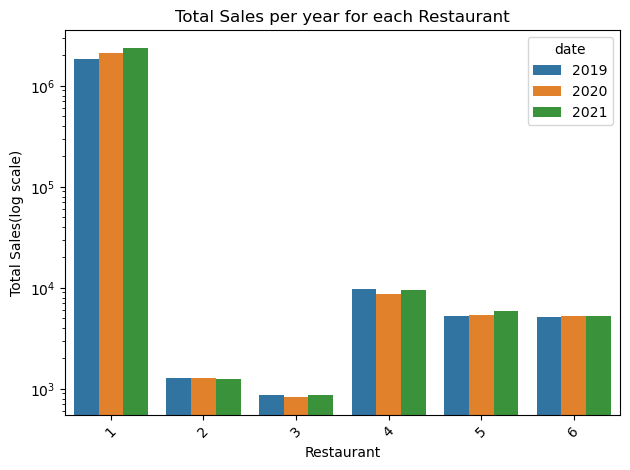

In [173]:
# Plotting Restaurants yearly sales
import seaborn as sns

restaurantsYearWise_Sales = merged_df1.groupby(['store_id', merged_df1['date'].dt.year])['total_cost'].sum().reset_index()

ax = sns.barplot(x = 'store_id', y = 'total_cost', hue = 'date', data=restaurantsYearWise_Sales)
plt.title('Total Sales per year for each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales(log scale)')
plt.xticks(rotation = 45)
plt.legend(title = 'date')

ax.set_yscale('log')

plt.tight_layout()
plt.show()

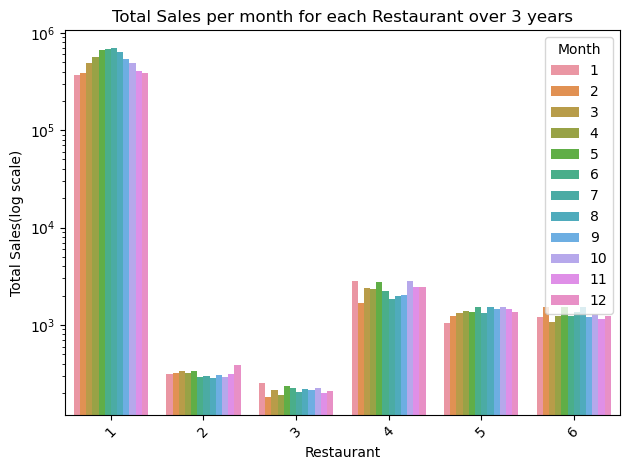

In [174]:
# Plotting Restaurants monthly sales
restaurantsMonthWise_Sales = merged_df1.groupby(['store_id', merged_df1['date'].dt.month])['total_cost'].sum().reset_index()

ax = sns.barplot(x = 'store_id', y = 'total_cost', hue = 'date', data = restaurantsMonthWise_Sales)
plt.title('Total Sales per month for each Restaurant over 3 years')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales(log scale)')
plt.xticks(rotation = 45)
plt.legend(title = 'Month')

ax.set_yscale('log')
plt.tight_layout()
plt.show()

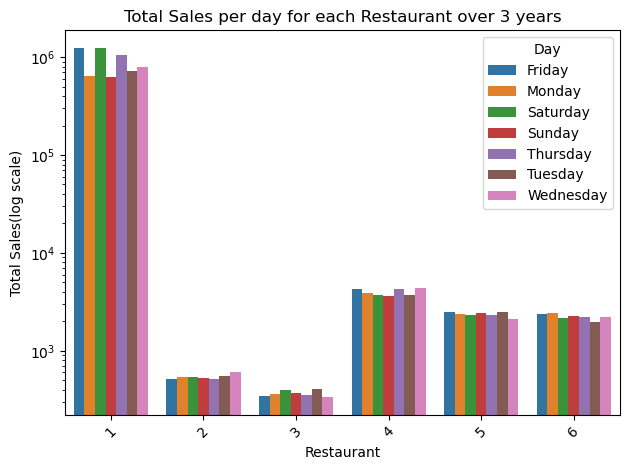

In [175]:
# Plotting Restaurants day wise sales
restaurantsDayWise_Sales = merged_df1.groupby(['store_id', merged_df1['date'].dt.day_name()])['total_cost'].sum().reset_index()

ax = sns.barplot(x = 'store_id', y = 'total_cost', hue = 'date', data = restaurantsDayWise_Sales)
plt.title('Total Sales per day for each Restaurant over 3 years')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales(log scale)')
plt.xticks(rotation = 45)
plt.legend(title = 'Day')

ax.set_yscale('log')
plt.tight_layout()
plt.show()

## f. Identify the most popular items overall and the stores where they are being sold. Also, find out the most popular item at each store

In [176]:
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0,0.00
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0,0.00
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0,175.32
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0,116.88


In [177]:
# Finding the item which has highest item_count and which restaurant is selling that item
item_sales = merged_df1.groupby(['item_id', 'item_name'])['item_count'].sum().reset_index()
most_popular_item = item_sales.loc[item_sales['item_count'].idxmax()]
# most_popular_item.head()
print('Most Popular item is : ', most_popular_item['item_name'])
store = merged_df1[merged_df1['item_id'] == most_popular_item['item_id']][['store_id', 'store_name']].drop_duplicates()
x = store['store_name'].tolist()
print('Store corresponding to the most popular item: ', x)

Most Popular item is :  Strawberry Smoothy
Store corresponding to the most popular item:  ["Bob's Diner"]


#### Result :- The most popular item is Strawberry Smoothy and it is being sold at "Bob's Diner".

In [178]:
# FInding the most popular item at each store
store_item_sales = merged_df1.groupby(['item_id', 'item_name', 'store_id', 'store_name'])['item_count'].sum().reset_index()
most_popular_item_by_store = store_item_sales.iloc[store_item_sales.groupby(['store_id', 'store_name'])['item_count'].idxmax()]
most_popular_item_by_store

,item_id,item_name,store_id,store_name,item_count
18,19,Strawberry Smoothy,1,Bob's Diner,236337.0
41,42,Fantastic Milky Smoothy,2,Beachfront Bar,1147.0
48,49,Awesome Smoothy,3,Sweet Shack,1692.0
79,80,Blue Ribbon Fruity Vegi Lunch,4,Fou Cher,298.0
70,71,Frozen Milky Smoothy,5,Corner Cafe,273.0
88,89,Awesome Soft Drink,6,Surfs Up,997.0


## g. Determine if the store with the highest sales volume is also making the most money per day

In [179]:
# Finding the total sales of the store which is selling maximum items
stores_sales_volume_per_day = merged_df1.groupby(['store_id', merged_df1['date']])['item_count'].sum().reset_index()
stores_max_sales_volume_per_day = stores_sales_volume_per_day.iloc[stores_sales_volume_per_day.groupby('store_id')['item_count'].idxmax()]
print(stores_max_sales_volume_per_day.head(10))

stores_total_sales_per_day = merged_df1.groupby(['store_id', merged_df1['date']])['total_cost'].sum().reset_index()
stores_max_sales_per_day = stores_total_sales_per_day.iloc[stores_total_sales_per_day.groupby('store_id')['total_cost'].idxmax()]
print(stores_max_sales_per_day.head(10))

      store_id       date  item_count
920          1 2021-07-09      1196.0
1452         2 2019-12-23         5.0
2442         3 2019-09-08         6.0
3311         4 2019-01-24         4.0
4449         5 2019-03-07         6.0
5515         6 2019-02-05         6.0
      store_id       date  total_cost
920          1 2021-07-09    11719.97
2113         2 2021-10-14       14.55
2724         3 2020-06-16       12.03
3358         4 2019-03-12      140.72
5412         5 2021-10-25       99.04
6266         6 2021-02-25       88.84


#### Result :- The store with the highest Sales volume is also making the most money per day. 

## h. Identify the most expensive item at each restaurant and find out its calorie count

In [180]:
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0,0.00
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0,0.00
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0,175.32
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0,116.88


In [181]:
# Finding the most expensive item at each store
store_with_most_expensive_item = merged_df1.iloc[merged_df1.groupby('store_id')['cost'].idxmax()].drop_duplicates()
store_with_most_expensive_item.head(10)

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44
28496,2,Beachfront Bar,62,Sweet Vegi Soft Drink,538,5.70,2019-01-01,0.0,0.00
38360,3,Sweet Shack,77,Blue Ribbon Frozen Milky Cake,636,7.70,2019-01-01,0.0,0.00
64664,4,Fou Cher,80,Blue Ribbon Fruity Vegi Lunch,881,53.98,2019-01-01,0.0,0.00
81104,5,Corner Cafe,50,Pike Lunch,653,26.37,2019-01-01,0.0,0.00
100832,6,Surfs Up,27,Steak Meal,607,26.21,2019-01-01,1.0,26.21


## Forecasting using machine learning algorithms:

## a. Build and compare linear regression, random forest, and XGBoost models for predictions

### - Generate necessary features for the development of these models, like day of the week, quarter of the year, month, year, day of the month and so on

In [182]:
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0,0.00
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0,0.00
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0,175.32
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0,116.88


In [183]:
# Extracting the day_of_week, quarter, month, year, day_of_month from date
merged_df1['day_of_week'] = merged_df1['date'].dt.weekday
merged_df1['quarter'] = merged_df1['date'].dt.quarter
merged_df1['month'] = merged_df1['date'].dt.month
merged_df1['year'] = merged_df1['date'].dt.year
merged_df1['day_of_month'] = merged_df1['date'].dt.day
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost,day_of_week,quarter,month,year,day_of_month
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44,1,1,1,2019,1
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0,0.00,2,1,1,2019,2
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0,0.00,3,1,1,2019,3
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0,175.32,4,1,1,2019,4
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0,116.88,5,1,1,2019,5


In [184]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [185]:
merged_df1.sort_values(by = 'date').tail()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost,day_of_week,quarter,month,year,day_of_month
76719,5,Corner Cafe,20,Fruity Milky Soft Drink,645,7.95,2021-12-31,0.0,0.0,4,4,12,2021,31
77815,5,Corner Cafe,26,Blue Ribbon Lamb with Rolls Lunch,611,7.55,2021-12-31,0.0,0.0,4,4,12,2021,31
78911,5,Corner Cafe,36,Fantastic Fish with Vegetables Entree,232,21.14,2021-12-31,0.0,0.0,4,4,12,2021,31
81103,5,Corner Cafe,43,Anglefood Cake,550,7.13,2021-12-31,0.0,0.0,4,4,12,2021,31
109599,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-31,0.0,0.0,4,4,12,2021,31


### - Use the data from the last six months as the testing data

In [186]:
# Spilling data into train and test series
latest_date = merged_df1['date'].max()
cutoff_date = latest_date - pd.DateOffset(month = 6)
print(latest_date)
print(cutoff_date)
training_data = merged_df1[merged_df1['date'] <= cutoff_date]
testing_data = merged_df1[merged_df1['date'] > cutoff_date]

2021-12-31 00:00:00
2021-06-30 00:00:00


In [187]:
merged_df1.head()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost,day_of_week,quarter,month,year,day_of_month
0,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-01,2.0,58.44,1,1,1,2019,1
1,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-02,0.0,0.00,2,1,1,2019,2
2,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-03,0.0,0.00,3,1,1,2019,3
3,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-04,6.0,175.32,4,1,1,2019,4
4,1,Bob's Diner,3,Sweet Fruity Cake,931,29.22,2019-01-05,4.0,116.88,5,1,1,2019,5


In [188]:
X_train = training_data[['store_id', 'item_id', 'day_of_week', 'quarter', 'month', 'year', 'day_of_month']]
X_test = testing_data[['store_id', 'item_id', 'day_of_week', 'quarter', 'month', 'year', 'day_of_month']]
y_train = training_data[['total_cost']]
y_test = testing_data[['total_cost']]

### Compute the root mean square error (RMSE) values for each model to compare their performances

In [189]:
# Building Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(lr_rmse)

217.6392010327355


In [190]:
# Building random forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(rf_rmse)

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_18857/1883310929.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


70.44152556426198


In [191]:
# Building xg boost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(xgb_rmse)

87.23322927796951


In [192]:
print('RMSE for Linear Regression: ', lr_rmse)
print('RMSE for Random Forest: ', rf_rmse)
print('RMSE for XGBoost: ', xgb_rmse)

RMSE for Linear Regression:  217.6392010327355
RMSE for Random Forest:  70.44152556426198
RMSE for XGBoost:  87.23322927796951


### Use the best-performing models to make a forecast for the next year

In [193]:
# Creating 1 year synthetic data
forecast_dates = pd.date_range(start = '2022-01-01', end = '2022-12-31', freq = 'D')
forecast_day_of_week = forecast_dates.dayofweek
forecast_quarter = forecast_dates.quarter
forecast_month = forecast_dates.month
forecast_year = forecast_dates.year
forecase_day_of_month = forecast_dates.day
forecast_store_id = np.random.choice(merged_df1['store_id'].unique(), len(forecast_dates))
forecast_item_id = np.random.choice(merged_df1['item_id'].unique(), len(forecast_dates))

forecast_data = {
    'store_id': forecast_store_id,
    'item_id' : forecast_item_id,
    'day_of_week' : forecast_day_of_week,
    'quarter' : forecast_quarter,
    'month' : forecast_month,
    'year' : forecast_year,
    'day_of_month' : forecase_day_of_month
}

forecast_df = pd.DataFrame(forecast_data)
forecast_df.head()

,store_id,item_id,day_of_week,quarter,month,year,day_of_month
0,5,92,5,1,1,2022,1
1,1,36,6,1,1,2022,2
2,2,46,0,1,1,2022,3
3,5,31,1,1,1,2022,4
4,6,9,2,1,1,2022,5


In [194]:
# Forcasting sales using rf model on synthetic data
forecast_sales = rf_model.predict(forecast_df)
print('Forecasting Sales for next Year: ', forecast_sales)

Forecasting Sales for next Year:  [4.6380000e-01 5.8880000e-01 4.4232000e+00 7.5500000e-02 2.4980000e-01
 5.9181420e+02 1.1200000e-01 3.4007400e+01 0.0000000e+00 3.0069000e+00
 1.1400000e-01 4.7720000e-01 1.5882600e+01 9.7400000e-01 0.0000000e+00
 7.4120000e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.1660000e-01
 0.0000000e+00 0.0000000e+00 1.9250000e+00 1.3312800e+01 3.5046250e+02
 3.8960000e-01 0.0000000e+00 4.1936000e+00 0.0000000e+00 3.3109000e+00
 2.5010000e-01 1.6392000e+00 0.0000000e+00 0.0000000e+00 4.8270000e-01
 7.8350000e-01 1.5230000e-01 4.2900000e-01 5.8190400e+02 1.9900000e-01
 4.4370000e+00 1.0080000e+00 1.2920000e-01 1.9308000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.4550000e-01 0.0000000e+00 3.4280000e-01
 0.0000000e+00 4.2233750e+02 0.0000000e+00 3.6694000e+00 0.0000000e+00
 9.9598000e+00 0.0000000e+00 0.0000000e+00 1.7157080e+02 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.0020000e-01 7.7787600e+01 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 

## Forecasting using deep learning algorithms:

### a. Use sales amount for predictions instead of item count

#### Already calculated Sales using item count and item price per unit.

### b. Build a long short-term memory (LSTM) model for predictions

In [195]:
merged_df1.tail()

,store_id,store_name,item_id,item_name,kcal,cost,date,item_count,total_cost,day_of_week,quarter,month,year,day_of_month
109595,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-27,0.0,0.0,0,4,12,2021,27
109596,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-28,0.0,0.0,1,4,12,2021,28
109597,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-29,0.0,0.0,2,4,12,2021,29
109598,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-30,0.0,0.0,3,4,12,2021,30
109599,6,Surfs Up,94,Fruity Milky Smoothy,331,5.71,2021-12-31,0.0,0.0,4,4,12,2021,31


In [196]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [197]:
df = merged_df1.groupby(['store_id', 'date'])['total_cost'].sum().reset_index()
df['day_of_week'] = df['date'].dt.weekday
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_month'] = df['date'].dt.day
df

,store_id,date,total_cost,day_of_week,quarter,month,year,day_of_month
0,1,2019-01-01,3956.02,1,1,1,2019,1
1,1,2019-01-02,2941.22,2,1,1,2019,2
2,1,2019-01-03,3914.70,3,1,1,2019,3
3,1,2019-01-04,4944.71,4,1,1,2019,4
4,1,2019-01-05,4845.76,5,1,1,2019,5
...,...,...,...,...,...,...,...,...
6571,6,2021-12-27,6.12,0,4,12,2021,27
6572,6,2021-12-28,29.27,1,4,12,2021,28
6573,6,2021-12-29,4.36,2,4,12,2021,29
6574,6,2021-12-30,0.00,3,4,12,2021,30


In [204]:
latest_date = df['date'].max()
cutoff_date = latest_date - pd.DateOffset(years = 1)
print(latest_date)
print(cutoff_date)
train_data = df[(df['date'] <= cutoff_date) & (df['store_id'] == 1)]
test_data = df[(df['date'] > cutoff_date) & (df['store_id'] == 1)]
# print(test_data)

2021-12-31 00:00:00
2020-12-31 00:00:00


In [205]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['total_cost']])
test_scaled = scaler.transform(test_data[['total_cost']])

In [210]:
# Create train and test datasets
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 100  # Number of time steps to look back
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)

# Reshape input data for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [211]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.0864
Epoch 2/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0334
Epoch 3/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0327
Epoch 4/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0323
Epoch 5/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0322
Epoch 6/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0315
Epoch 7/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 8/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0326
Epoch 9/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0309
Epoch 10/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0303
Epoch 11/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0297
Epoch 12/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0286
Epoch 13/50
20/20 [==================

In [214]:
# Make predictions for test data
test_prediction = model.predict(X_test)

# Inverse scale the predictions and actual values
test_predictions_inv = scaler.inverse_transform(test_prediction)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 [==============================] - 0s 4ms/step


In [215]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.11956478630871115


In [232]:
# Forecast sales for the next 3 months
last_sequence = test_scaled[-time_steps:]
# print(test_data[['total_cost']])
next_sequence = np.expand_dims(last_sequence, axis=0)
forecast = []
for _ in range(90):
    next_day_sales = model.predict(next_sequence)[0][0]
    forecast.append(next_day_sales)
    next_sequence = np.roll(next_sequence, -1, axis=1)
    next_sequence[0, -1, 0] = next_day_sales

# Inverse transform forecasted sales
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Print forecasted sales for the next 3 months
print("Forecasted Sales for the Next 3 Months:")
for i, sales in enumerate(forecast):
    print(f"day {i+1}: {sales[0]}")

1/1 [==============================] - 0s 9ms/step
Forecasted Sales for the Next 3 Months:
day 1: 6603.578125
day 2: 3626.24267578125
day 3: 2282.613525390625
day 4: 2918.319091796875
day 5: 4241.62841796875
day 6: 5964.01318359375
day 7: 7341.04833984375
day 8: 6728.56982421875
day 9: 4049.58837890625
day 10: 2530.086181640625
day 11: 3026.439208984375
day 12: 4275.0615234375
day 13: 5929.7919921875
day 14: 7307.71435546875
day 15: 6868.32421875
day 16: 4365.07763671875
day 17: 2758.816162109375
day 18: 3160.415283203125
day 19: 4358.3701171875
day 20: 5967.4775390625
day 21: 7340.24169921875
day 22: 7004.1767578125
day 23: 4618.25146484375
day 24: 2968.433349609375
day 25: 3307.263916015625
day 26: 4471.2021484375
day 27: 6049.255859375
day 28: 7415.90771484375
day 29: 7143.67138671875
day 30: 4835.9248046875
day 31: 3163.9287109375
day 32: 3461.74609375
day 33: 4602.73388671875
day 34: 6159.38916015625
day 35: 7520.1318359375
day 36: 7287.82763671875
day 37: 5032.00390625
day 38: 33

### Result: Created Lstm model by taking 1 store data. I got MAPE 0.11 on test data.